Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6834 - mae: 0.7483 - val_loss: 0.0911 - val_mae: 0.2463
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1677 - mae: 0.3616 - val_loss: 0.0377 - val_mae: 0.1622
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0809 - mae: 0.2279 - val_loss: 0.0161 - val_mae: 0.1055
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.0424 - mae: 0.1624 - val_loss: 0.0146 - val_mae: 0.1054
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0380 - mae: 0.1480 - val_loss: 0.0156 - val_mae: 0.1116
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.0363 - mae: 0.1423 - val_loss: 0.0139 - val_mae: 0.1056
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.0370 - mae: 0.1464 - val_loss: 0.0074 - val_mae: 0.0722
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.0282 - mae: 0.1324 - val_loss: 0.0061 - val_mae: 0.0636
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - l

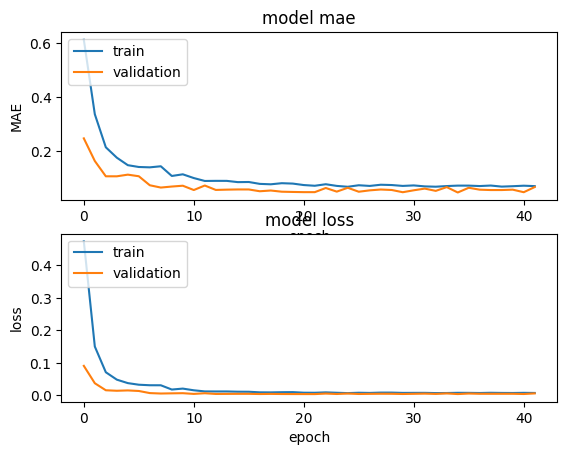

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score


# load admissions data
admissions_data = pd.read_csv('Admission_Predict.csv')
#print(admissions_data.head())

#admissions_data.describe()
#print(admissions_data.shape)

# mark predicted values
labels = admissions_data.iloc[:,-1]
#print(labels.describe())

# mark features
features = admissions_data.iloc[:, 1:8]

#split our training and test set
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state = 42)

# standardizing our data by scaling it
sc = StandardScaler()
features_train_scale = sc.fit_transform(features_train)
features_test_scale = sc.transform(features_test)

# commented out code for if you want to check out the scaled data

#features_train_scale = pd.DataFrame(features_train_scale, columns = features_train.columns)
#features_test_scale = pd.DataFrame(features_test_scale, columns = features_test.columns)

#print(features_train_scale.describe())
#print(features_test_scale.describe())

# function to design the model
def design_model(feature_data):
	model = Sequential()
	num_features = feature_data.shape[1]
	input = tf.keras.Input(shape=(num_features,))
	model.add(input)
	# this model has two hidden layers and two dropout layers
	# relu activation function is used at both hidden layers
	hidden_layer = layers.Dense(16, activation='relu')
	model.add(hidden_layer)
	model.add(layers.Dropout(0.1))
	hidden_layer_2 = layers.Dense(8, activation='relu')
	model.add(hidden_layer_2)
	model.add(layers.Dropout(0.2))
	model.add(layers.Dense(1))

	# using an adam optimizer with a learning rate of 0.005
	# using mean-squared error as our loss function and mean average error as our metric
	opt = keras.optimizers.Adam(learning_rate=0.005)
	model.compile(loss='mse', metrics=['mae'], optimizer=opt)
	return model


# apply the model to the scaled training data
model = design_model(features_train_scale)
#print(model.summary())

# apply early stopping for efficiency
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# fit the model with 100 epochs and a batch size of 8
# validation split at 0.25
history = model.fit(features_train_scale, labels_train.to_numpy(), epochs=100, batch_size=8, verbose=1, validation_split=0.25, callbacks=[es])

# evaluate the model
val_mse, val_mae = model.evaluate(features_test_scale, labels_test.to_numpy(), verbose = 0)

# view the MAE performance
print("MAE: ", val_mae)

# evauate r-squared score
y_pred = model.predict(features_test_scale)

print(r2_score(labels_test,y_pred))

# plot MAE and val_MAE over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()